In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ks_2samp, kstest
from scipy.stats import kstest
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load dataset (Replace with actual dataset)
df = pd.read_csv("data_1 regression.csv")

In [5]:
df.head()

,Performance Index,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,91,7,99,1,9,1
1,65,4,82,0,4,2
2,45,8,51,1,7,2
3,36,5,52,1,5,2
4,66,7,75,0,8,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Performance Index                 10000 non-null  int64
 1   Hours Studied                     10000 non-null  int64
 2   Previous Scores                   10000 non-null  int64
 3   Extracurricular Activities        10000 non-null  int64
 4   Sleep Hours                       10000 non-null  int64
 5   Sample Question Papers Practiced  10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [9]:
# Load dataset (Replace with actual dataset)
#df = pd.read_csv("your_dataset.csv")

# Replace "YourDependentVariable" with the actual name of the target variable
y = df["Performance Index"]  # Dependent variable
X = df.drop(columns=["Performance Index"])  # Independent variables

# Add a constant for statsmodels regression (intercept)
X = sm.add_constant(X)

# Split data into training and test sets (Optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


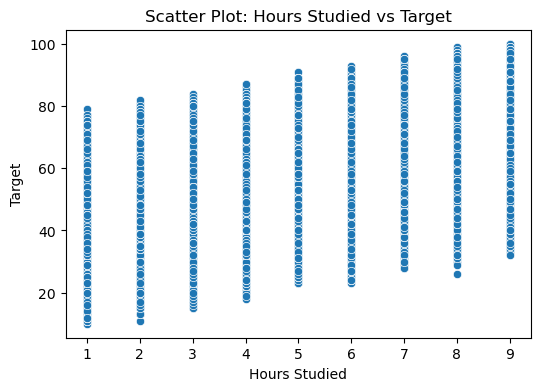

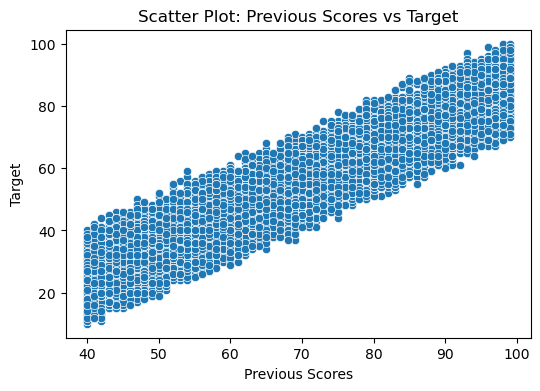

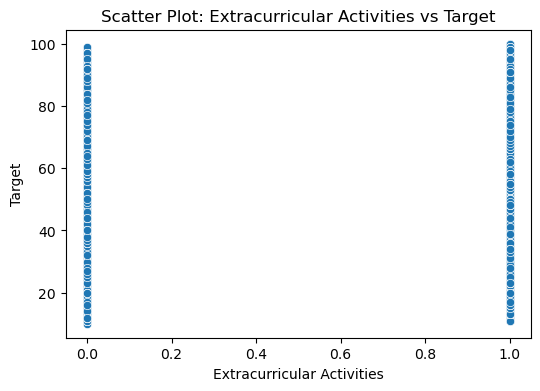

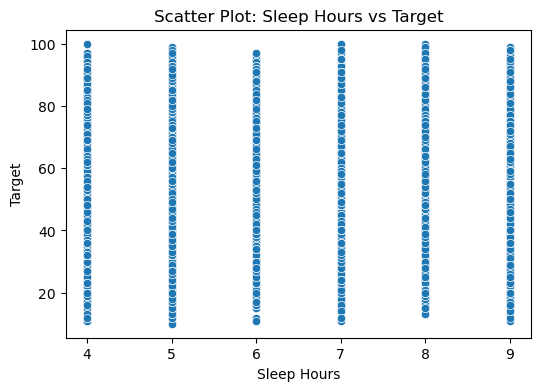

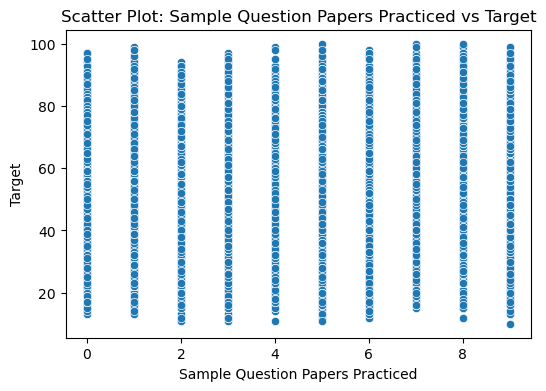


✅ Linearity Check Done. Scatter plots should show linear trends.



In [11]:
# Scatter plots of independent variables vs. target variable
for col in X.columns[1:]:  # Skip constant column
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=y)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"Scatter Plot: {col} vs Target")
    plt.show()

# Correlation Matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Correlation Matrix")
#plt.show()

# Interpretation
print("\n✅ Linearity Check Done. Scatter plots should show linear trends.\n")


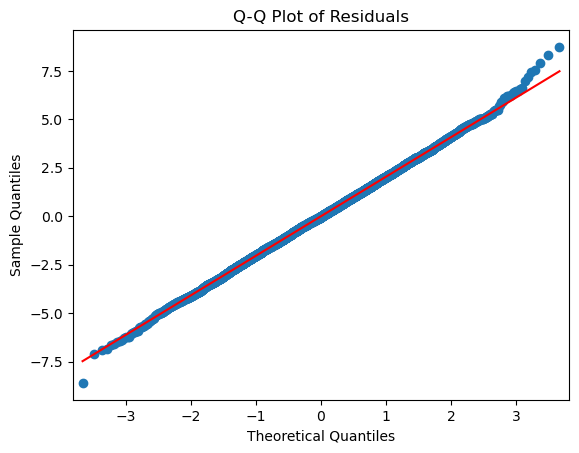


Shapiro-Wilk Test: Statistic=0.9997, p-value=0.2707
✅ Residuals are normally distributed (p > 0.05)


Kolmogorov-Smirnov Test: Statistic=0.0085, p-value=0.6102
✅ Residuals follow a normal distribution (p > 0.05)



In [11]:
# Fit regression model
model = sm.OLS(y_train, X_train).fit()
residuals = model.resid  # Get residuals

# Q-Q Plot (Check for normality)
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
p_value = shapiro_test.pvalue
print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("✅ Residuals are normally distributed (p > 0.05)\n")
else:
    print("❌ Residuals are NOT normally distributed (p ≤ 0.05). Consider transformations.\n")

# Import the KS test function
from scipy.stats import kstest

# Compute KS Test for normality of residuals
ks_statistic, ks_p_value = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

# Print KS Test results
print(f"\nKolmogorov-Smirnov Test: Statistic={ks_statistic:.4f}, p-value={ks_p_value:.4f}")

# Interpretation
if ks_p_value > 0.05:
    print("✅ Residuals follow a normal distribution (p > 0.05)\n")
else:
    print("❌ Residuals do NOT follow a normal distribution (p ≤ 0.05). Consider transformations.\n")



<Figure size 600x600 with 0 Axes>

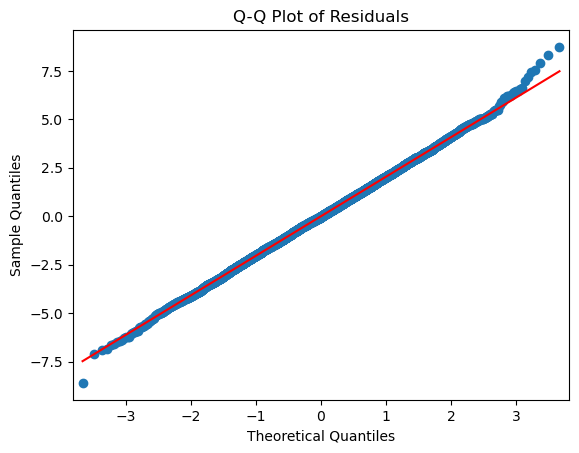


Shapiro-Wilk Test: Statistic=0.9997, p-value=0.2707
✅ Residuals are normally distributed (p > 0.05)


Kolmogorov-Smirnov Test: Statistic=0.0085, p-value=0.6102
✅ Residuals follow a normal distribution (p > 0.05)



In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest

# Fit regression model
model = sm.OLS(y_train, X_train).fit()
residuals = model.resid  # Get residuals

# Q-Q Plot (Check for normality)
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

def test_normality(data):
    """Perform Shapiro-Wilk and Kolmogorov-Smirnov tests for normality."""
    
    # Shapiro-Wilk test
    shapiro_test = shapiro(data)
    p_value_shapiro = shapiro_test.pvalue
    print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={p_value_shapiro:.4f}")
    print("✅ Residuals are normally distributed (p > 0.05)\n" if p_value_shapiro > 0.05 
          else "❌ Residuals are NOT normally distributed (p ≤ 0.05). Consider transformations.\n")

    # Precompute mean and std for KS test
    mean_resid, std_resid = np.mean(data), np.std(data)

    # Kolmogorov-Smirnov Test
    ks_statistic, ks_p_value = kstest(data, 'norm', args=(mean_resid, std_resid))
    print(f"\nKolmogorov-Smirnov Test: Statistic={ks_statistic:.4f}, p-value={ks_p_value:.4f}")
    print("✅ Residuals follow a normal distribution (p > 0.05)\n" if ks_p_value > 0.05 
          else "❌ Residuals do NOT follow a normal distribution (p ≤ 0.05). Consider transformations.\n")

# Perform Normality Tests
test_normality(residuals)


In [15]:
# Durbin-Watson Test
dw_stat = durbin_watson(residuals)

print(f"\nDurbin-Watson Statistic: {dw_stat:.4f}")

if 1.5 < dw_stat < 2.5:
    print("✅ No autocorrelation detected (1.5 < DW < 2.5)\n")
elif dw_stat < 1.5:
    print("❌ Positive autocorrelation detected (DW < 1.5). Consider lag variables or different models.\n")
else:
    print("❌ Negative autocorrelation detected (DW > 2.5). Consider lag variables or different models.\n")



Durbin-Watson Statistic: 2.0331
✅ No autocorrelation detected (1.5 < DW < 2.5)




📌 Variance Inflation Factor (VIF) Values:
                            Feature        VIF
0                             const  39.149899
1                     Hours Studied   1.000387
2                   Previous Scores   1.000243
3        Extracurricular Activities   1.000428
4                       Sleep Hours   1.000461
5  Sample Question Papers Practiced   1.000320

❌ Multicollinearity detected (Some VIF > 10). Check correlation matrix.



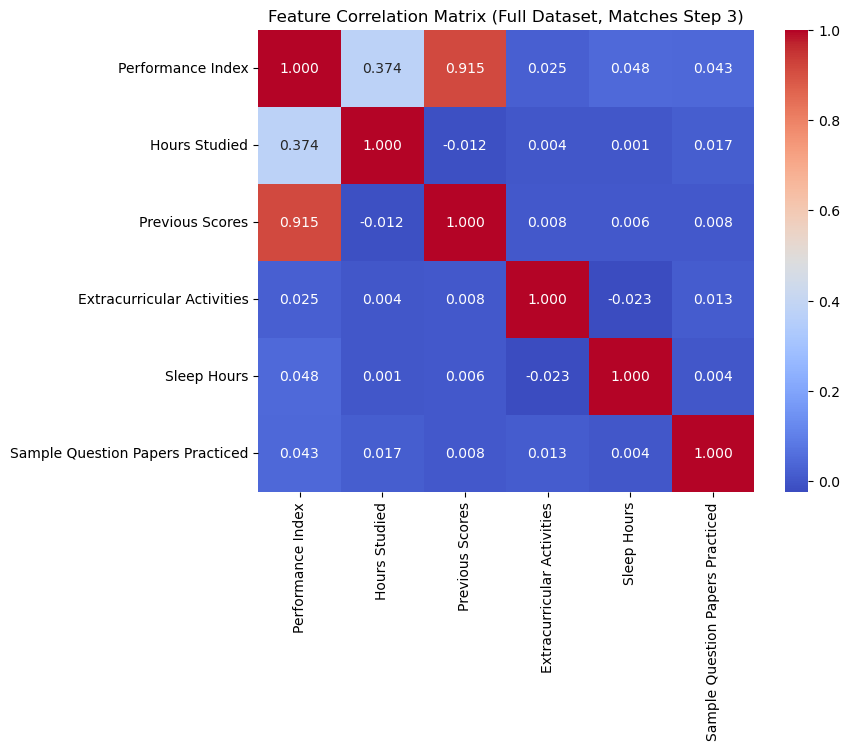

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature (excluding constant)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display VIF values
print("\n📌 Variance Inflation Factor (VIF) Values:")
print(vif_data)

# Check for high VIF values
high_vif = vif_data[vif_data["VIF"] > 10]

if high_vif.empty:
    print("\n✅ No multicollinearity detected (All VIF < 10)\n")
else:
    print("\n❌ Multicollinearity detected (Some VIF > 10). Check correlation matrix.\n")

# **Corrected Correlation Matrix (Matches Step 3 Exactly)**
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Feature Correlation Matrix (Full Dataset, Matches Step 3)")
plt.show()



Levene's Test p-value: 0.7363
✅ Residual variance is constant (Homoscedasticity holds)



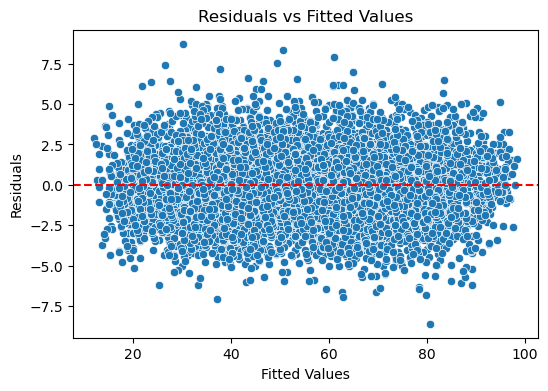

In [17]:
# Levene's Test for homoscedasticity
_, p_value = stats.levene(y_train, model.fittedvalues)

print(f"\nLevene's Test p-value: {p_value:.4f}")

if p_value > 0.05:
    print("✅ Residual variance is constant (Homoscedasticity holds)\n")
else:
    print("❌ Residual variance is NOT constant (Heteroscedasticity detected). Consider transformations.\n")

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


In [19]:
# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print full summary of regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:02:17   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [21]:
from tabulate import tabulate  # For console table formatting
import pandas as pd
import numpy as np
from IPython.display import display  # For Jupyter Notebook display

# Number of observations
n = len(y_train)

# Number of predictors
p = X_train.shape[1]  # Includes the intercept

# Compute Sum of Squares
ssr = np.sum((model.fittedvalues - np.mean(y_train)) ** 2)  # Regression sum of squares
sse = np.sum(model.resid ** 2)  # Residual sum of squares
sst = ssr + sse  # Total sum of squares

# Correct Degrees of Freedom
df_regression = p - 1  # Number of predictors
df_residual = n - p  # Residual df = total observations - number of parameters
df_total = n - 1  # Total degrees of freedom

# Correct Mean Squares
msr = ssr / df_regression if df_regression > 0 else 0  # Mean square regression
mse = sse / df_residual if df_residual > 0 else 0  # Mean square error

# Correct F-statistic
f_stat = (msr / mse) if mse != 0 else 0
f_p_value = 1 - stats.f.cdf(f_stat, df_regression, df_residual) if f_stat > 0 else 1

# Construct the Corrected ANOVA table
anova_table = pd.DataFrame({
    "Source": ["Regression", "Residual", "Total"],
    "Sum of Squares (SS)": [ssr, sse, sst],
    "Degrees of Freedom (df)": [df_regression, df_residual, df_total],
    "Mean Squares (MS)": [msr, mse, "-"],  
    "F-statistic": [f_stat, "-", "-"],  
    "p-value": [f_p_value, "-", "-"]  
})

# Beautify and Display ANOVA Table
print("\n📌 **Corrected ANOVA Table:**")
print(tabulate(anova_table, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))

# Display ANOVA Table in Jupyter Notebook
display(anova_table.style.set_caption("Corrected ANOVA Table").format(precision=4))

# Extract Key Regression Metrics
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "Standard Error": model.bse.values,
    "p-value": model.pvalues.values
})

# Beautify and Display Regression Coefficients Table
print("\n📌 **Regression Coefficients Table:**")
print(tabulate(coeff_summary, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))

# Display Regression Coefficients Table in Jupyter Notebook
display(coeff_summary.style.set_caption("Regression Coefficients Table").format(precision=4))



📌 **Corrected ANOVA Table:**
╒════╤════════════╤═══════════════════════╤═══════════════════════════╤═════════════════════╤═══════════════════╤════════════════════════╕
│    │ Source     │   Sum of Squares (SS) │   Degrees of Freedom (df) │ Mean Squares (MS)   │ F-statistic       │ p-value                │
╞════╪════════════╪═══════════════════════╪═══════════════════════════╪═════════════════════╪═══════════════════╪════════════════════════╡
│  0 │ Regression │          2916025.8552 │                         5 │ 583205.171040758    │ 139761.3153909649 │ 1.1102230246251565e-16 │
├────┼────────────┼───────────────────────┼───────────────────────────┼─────────────────────┼───────────────────┼────────────────────────┤
│  1 │ Residual   │            33357.8868 │                      7994 │ 4.172865498648993   │ -                 │ -                      │
├────┼────────────┼───────────────────────┼───────────────────────────┼─────────────────────┼───────────────────┼───────────────────────

,Source,Sum of Squares (SS),Degrees of Freedom (df),Mean Squares (MS),F-statistic,p-value
0,Regression,2916025.8552,5,583205.1710,139761.3154,0.0000
1,Residual,33357.8868,7994,4.1729,-,-
2,Total,2949383.7420,7999,-,-,-



📌 **Regression Coefficients Table:**
╒════╤══════════════════════════════════╤═══════════════╤══════════════════╤═══════════╕
│    │ Feature                          │   Coefficient │   Standard Error │   p-value │
╞════╪══════════════════════════════════╪═══════════════╪══════════════════╪═══════════╡
│  0 │ const                            │      -33.9219 │           0.1429 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼──────────────────┼───────────┤
│  1 │ Hours Studied                    │        2.8525 │           0.0088 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼──────────────────┼───────────┤
│  2 │ Previous Scores                  │        1.0170 │           0.0013 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼──────────────────┼───────────┤
│  3 │ Extracurricular Activities       │        0.6086 │           0.0457 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼───────────────

,Feature,Coefficient,Standard Error,p-value
0,const,-33.9219,0.1429,0.0000
1,Hours Studied,2.8525,0.0088,0.0000
2,Previous Scores,1.0170,0.0013,0.0000
3,Extracurricular Activities,0.6086,0.0457,0.0000
4,Sleep Hours,0.4769,0.0135,0.0000
5,Sample Question Papers Practiced,0.1918,0.0080,0.0000


In [23]:
from tabulate import tabulate  # Console table formatting
import pandas as pd
import numpy as np
from scipy.stats import f
from IPython.display import display  # Jupyter display

def compute_anova(model, y_train, X_train):
    """Compute ANOVA table for OLS regression."""
    n, p = len(y_train), X_train.shape[1]  # Observations & predictors

    # Sum of Squares
    y_mean = np.mean(y_train)
    ssr = np.sum((model.fittedvalues - y_mean) ** 2)  # Regression SS
    sse = np.sum(model.resid ** 2)  # Residual SS
    sst = ssr + sse  # Total SS

    # Degrees of Freedom
    df_regression, df_residual, df_total = p - 1, n - p, n - 1

    # Mean Squares & F-statistic
    msr = ssr / df_regression if df_regression > 0 else np.nan
    mse = sse / df_residual if df_residual > 0 else np.nan
    f_stat = msr / mse if mse > 0 else np.nan
    f_p_value = 1 - f.cdf(f_stat, df_regression, df_residual) if f_stat > 0 else np.nan

    # Construct DataFrame
    anova_table = pd.DataFrame({
        "Source": ["Regression", "Residual", "Total"],
        "Sum of Squares (SS)": [ssr, sse, sst],
        "Degrees of Freedom (df)": [df_regression, df_residual, df_total],
        "Mean Squares (MS)": [msr, mse, np.nan],  
        "F-statistic": [f_stat, np.nan, np.nan],  
        "p-value": [f_p_value, np.nan, np.nan]  
    })

    return anova_table

def compute_regression_summary(model):
    """Generate a formatted summary of regression coefficients."""
    return pd.DataFrame({
        "Feature": model.params.index,
        "Coefficient": model.params.values,
        "Standard Error": model.bse.values,
        "p-value": model.pvalues.values
    })

# Compute ANOVA Table
anova_table = compute_anova(model, y_train, X_train)

# Display ANOVA Table
print("\n📌 **Corrected ANOVA Table:**")
print(tabulate(anova_table, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))
display(anova_table.style.set_caption("Corrected ANOVA Table").format(precision=4))

# Compute and Display Regression Summary
coeff_summary = compute_regression_summary(model)
print("\n📌 **Regression Coefficients Table:**")
print(tabulate(coeff_summary, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))
display(coeff_summary.style.set_caption("Regression Coefficients Table").format(precision=4))



📌 **Corrected ANOVA Table:**
╒════╤════════════╤═══════════════════════╤═══════════════════════════╤═════════════════════╤═══════════════╤═══════════╕
│    │ Source     │   Sum of Squares (SS) │   Degrees of Freedom (df) │   Mean Squares (MS) │   F-statistic │   p-value │
╞════╪════════════╪═══════════════════════╪═══════════════════════════╪═════════════════════╪═══════════════╪═══════════╡
│  0 │ Regression │          2916025.8552 │                         5 │         583205.1710 │   139761.3154 │    0.0000 │
├────┼────────────┼───────────────────────┼───────────────────────────┼─────────────────────┼───────────────┼───────────┤
│  1 │ Residual   │            33357.8868 │                      7994 │              4.1729 │      nan      │  nan      │
├────┼────────────┼───────────────────────┼───────────────────────────┼─────────────────────┼───────────────┼───────────┤
│  2 │ Total      │          2949383.7420 │                      7999 │            nan      │      nan      │  nan  

,Source,Sum of Squares (SS),Degrees of Freedom (df),Mean Squares (MS),F-statistic,p-value
0,Regression,2916025.8552,5,583205.1710,139761.3154,0.0000
1,Residual,33357.8868,7994,4.1729,nan,nan
2,Total,2949383.7420,7999,nan,nan,nan



📌 **Regression Coefficients Table:**
╒════╤══════════════════════════════════╤═══════════════╤══════════════════╤═══════════╕
│    │ Feature                          │   Coefficient │   Standard Error │   p-value │
╞════╪══════════════════════════════════╪═══════════════╪══════════════════╪═══════════╡
│  0 │ const                            │      -33.9219 │           0.1429 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼──────────────────┼───────────┤
│  1 │ Hours Studied                    │        2.8525 │           0.0088 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼──────────────────┼───────────┤
│  2 │ Previous Scores                  │        1.0170 │           0.0013 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼──────────────────┼───────────┤
│  3 │ Extracurricular Activities       │        0.6086 │           0.0457 │    0.0000 │
├────┼──────────────────────────────────┼───────────────┼───────────────

,Feature,Coefficient,Standard Error,p-value
0,const,-33.9219,0.1429,0.0000
1,Hours Studied,2.8525,0.0088,0.0000
2,Previous Scores,1.0170,0.0013,0.0000
3,Extracurricular Activities,0.6086,0.0457,0.0000
4,Sleep Hours,0.4769,0.0135,0.0000
5,Sample Question Papers Practiced,0.1918,0.0080,0.0000
